In [ ]:
# Grafica los campos de viento a 925 hPa alineados
# relativo al onset de la temporada de lluvias.

import os

import rioxarray

import pandas as pd
import numpy as np

import xarray as xr
import geopandas as gpd

import holoviews as hv
import geoviews as gv

import geoviews.feature as gf

from shapely.ops import clip_by_rect

# Se carga el motor gráfico de Geoviews.
gv.extension("matplotlib")
gv.output(size = 600)

In [ ]:
# Datos.

path_d = "../data/ERA5/"
path_c = "../results/onset/"
path_r = "../results/onset/graficas/"
path_map = "../data/Mapas/ne_10m_coastline/"
path_map = "../data/Mapas/ne_50m_coastline/"
path_shp = "../data/Cuencas/Regiones_Hidrologicas_Administrativas/"
name_shp = "rha250kgw.shp"

vars = [ "U", "sst", "olr" ]
levels = [ "925" ]
region = [ "mexico" ]

# Se carga el contorno de México.
gdf = gpd.read_file(path_shp + name_shp)
# Se obtiene el contorno de los países.
gdf["boundary"] = gdf.boundary

i = 2

# Media movil
d = 20

composite = xr.open_dataset( path_c + "onset_composite_"
    + vars[i] + "_mean_" + str(d) + "_dias.nc" )

zones =  [ (-115, 5, -50, 35), (-80, 12.5, -70, 17.5) ]

# Línea de costa
coast = gpd.read_file( path_map )[ ["featurecla", "geometry"] ]
coast["geometry"] = coast["geometry"
    ].apply(clip_by_rect, args = zones[0])
coast = coast[~coast["geometry"].is_empty]
coast = gv.Path( coast ).opts( linewidth = 1, color = "k" )

#coast = gf.coastline.opts(linewidth = 1.5)
border = gf.borders.opts(linewidth = 1.5)

# Seleccionamos la Cuenca del Valle de México.
cuenca = ( gv.Path(
    gdf[gdf["ORG_CUENCA"] == "Aguas del Valle de México"]
        ).opts( color = "black", linewidth = 1 ) )

area = coast * border * cuenca * gv.Rectangles( zones[1] ).options( 
    color = (0, 0, 0, 0), linewidth = 1.5 )

composite

<xarray.Dataset>
Dimensions:      (latitude: 161, longitude: 281, dayofyear: 121)
Coordinates:
    step         timedelta64[ns] ...
    surface      int64 ...
  * latitude     (latitude) float64 40.0 39.75 39.5 39.25 ... 0.75 0.5 0.25 0.0
  * longitude    (longitude) float64 -120.0 -119.8 -119.5 ... -50.5 -50.25 -50.0
  * dayofyear    (dayofyear) int64 -60 -59 -58 -57 -56 -55 ... 55 56 57 58 59 60
Data variables:
    mtnlwrf      (dayofyear, latitude, longitude) float64 ...
    spatial_ref  int64 ...

:Overlay
   .FilledContours.I :FilledContours   [Longitude,Latitude]   (z)
   .Path.I           :Path   [Longitude,Latitude]   (featurecla)
   .Borders.I        :Feature   [Longitude,Latitude]
   .Path.II          :Path   [Longitude,Latitude]   (AREA,PERIMETER,COV_,COV_ID,CLAVE,ORG_CUENCA,CLV_OC,SHAPE_AREA,SHAPE_LEN)
   .Rectangles.I     :Rectangles   [lon0,lat0,lon1,lat1]
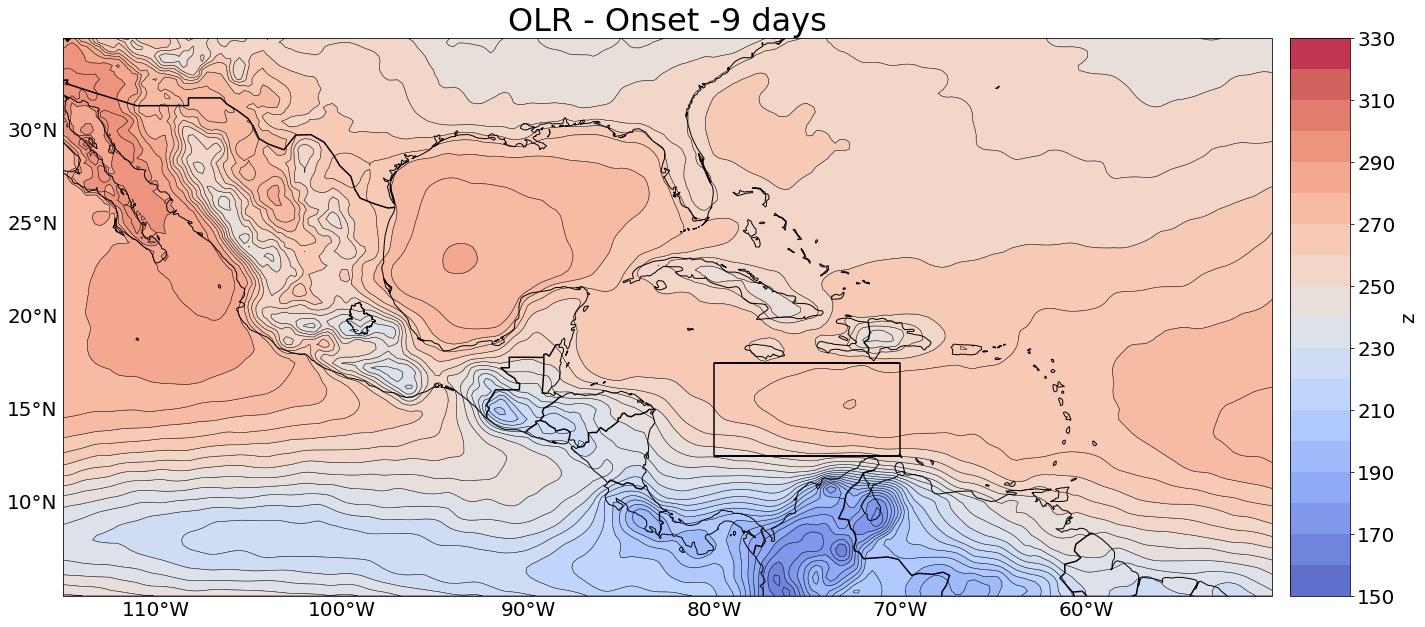

:Overlay
   .FilledContours.I :FilledContours   [Longitude,Latitude]   (z)
   .Path.I           :Path   [Longitude,Latitude]   (featurecla)
   .Borders.I        :Feature   [Longitude,Latitude]
   .Path.II          :Path   [Longitude,Latitude]   (AREA,PERIMETER,COV_,COV_ID,CLAVE,ORG_CUENCA,CLV_OC,SHAPE_AREA,SHAPE_LEN)
   .Rectangles.I     :Rectangles   [lon0,lat0,lon1,lat1]
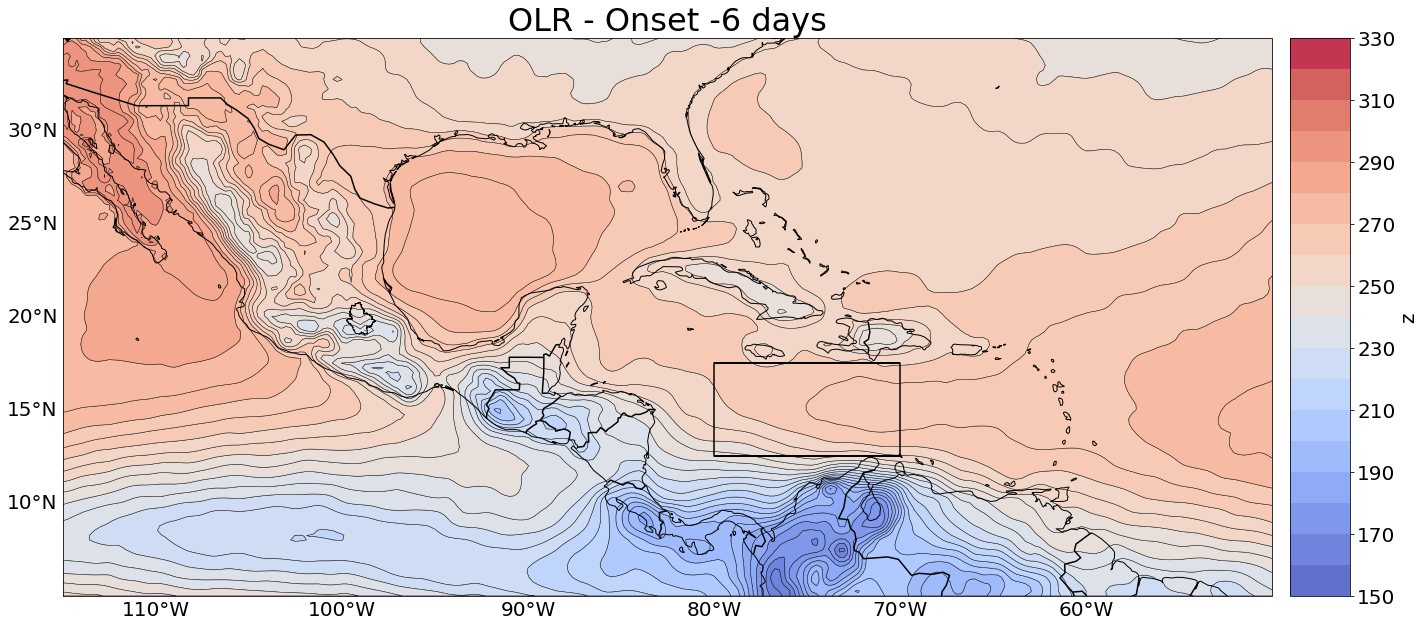

:Overlay
   .FilledContours.I :FilledContours   [Longitude,Latitude]   (z)
   .Path.I           :Path   [Longitude,Latitude]   (featurecla)
   .Borders.I        :Feature   [Longitude,Latitude]
   .Path.II          :Path   [Longitude,Latitude]   (AREA,PERIMETER,COV_,COV_ID,CLAVE,ORG_CUENCA,CLV_OC,SHAPE_AREA,SHAPE_LEN)
   .Rectangles.I     :Rectangles   [lon0,lat0,lon1,lat1]
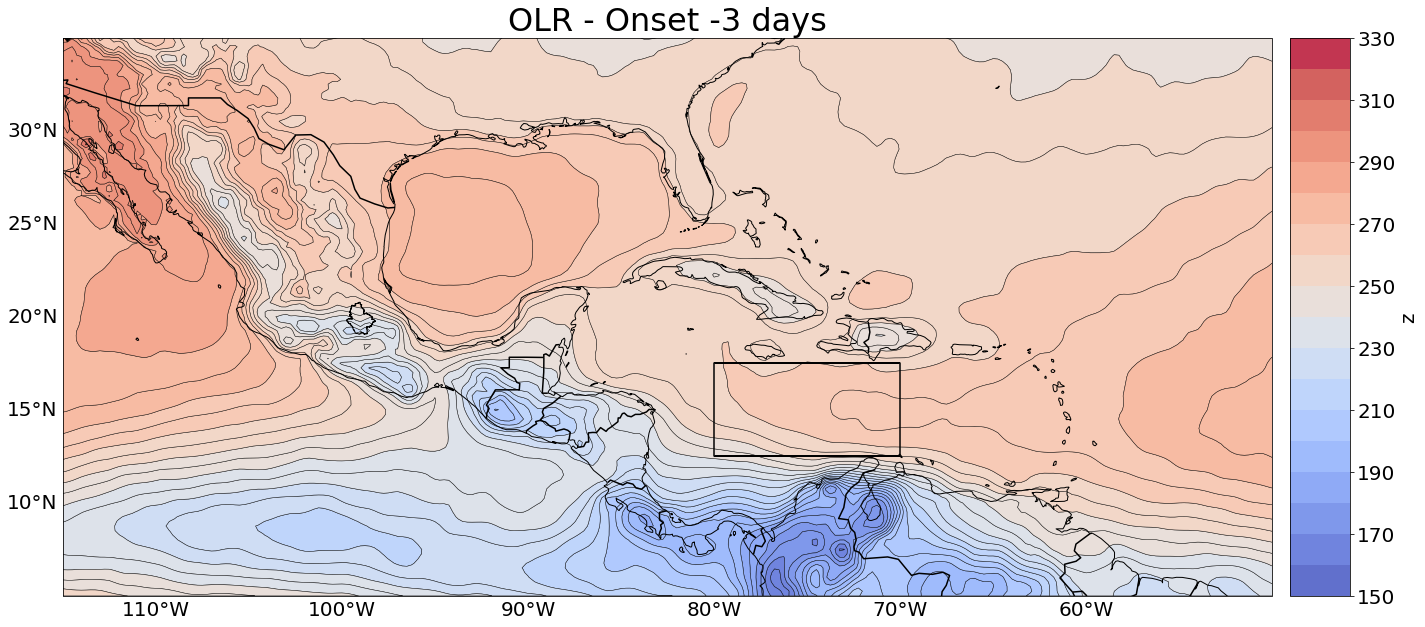

:Overlay
   .FilledContours.I :FilledContours   [Longitude,Latitude]   (z)
   .Path.I           :Path   [Longitude,Latitude]   (featurecla)
   .Borders.I        :Feature   [Longitude,Latitude]
   .Path.II          :Path   [Longitude,Latitude]   (AREA,PERIMETER,COV_,COV_ID,CLAVE,ORG_CUENCA,CLV_OC,SHAPE_AREA,SHAPE_LEN)
   .Rectangles.I     :Rectangles   [lon0,lat0,lon1,lat1]
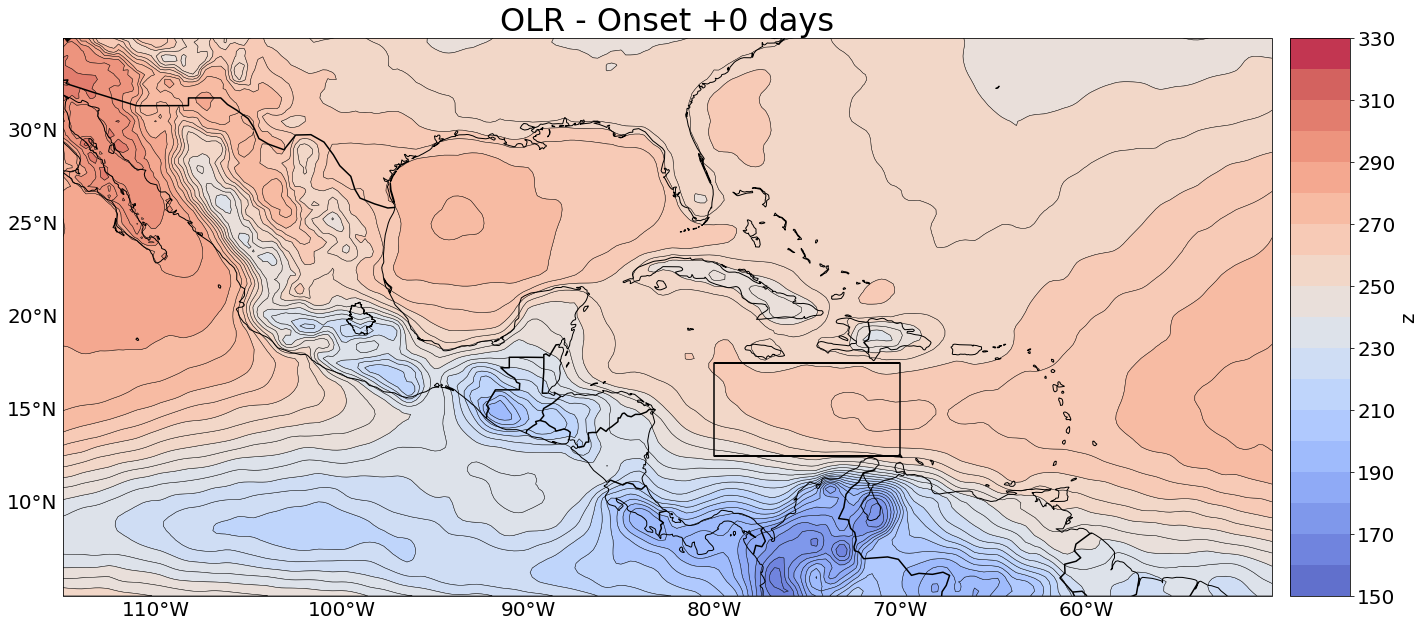

:Overlay
   .FilledContours.I :FilledContours   [Longitude,Latitude]   (z)
   .Path.I           :Path   [Longitude,Latitude]   (featurecla)
   .Borders.I        :Feature   [Longitude,Latitude]
   .Path.II          :Path   [Longitude,Latitude]   (AREA,PERIMETER,COV_,COV_ID,CLAVE,ORG_CUENCA,CLV_OC,SHAPE_AREA,SHAPE_LEN)
   .Rectangles.I     :Rectangles   [lon0,lat0,lon1,lat1]
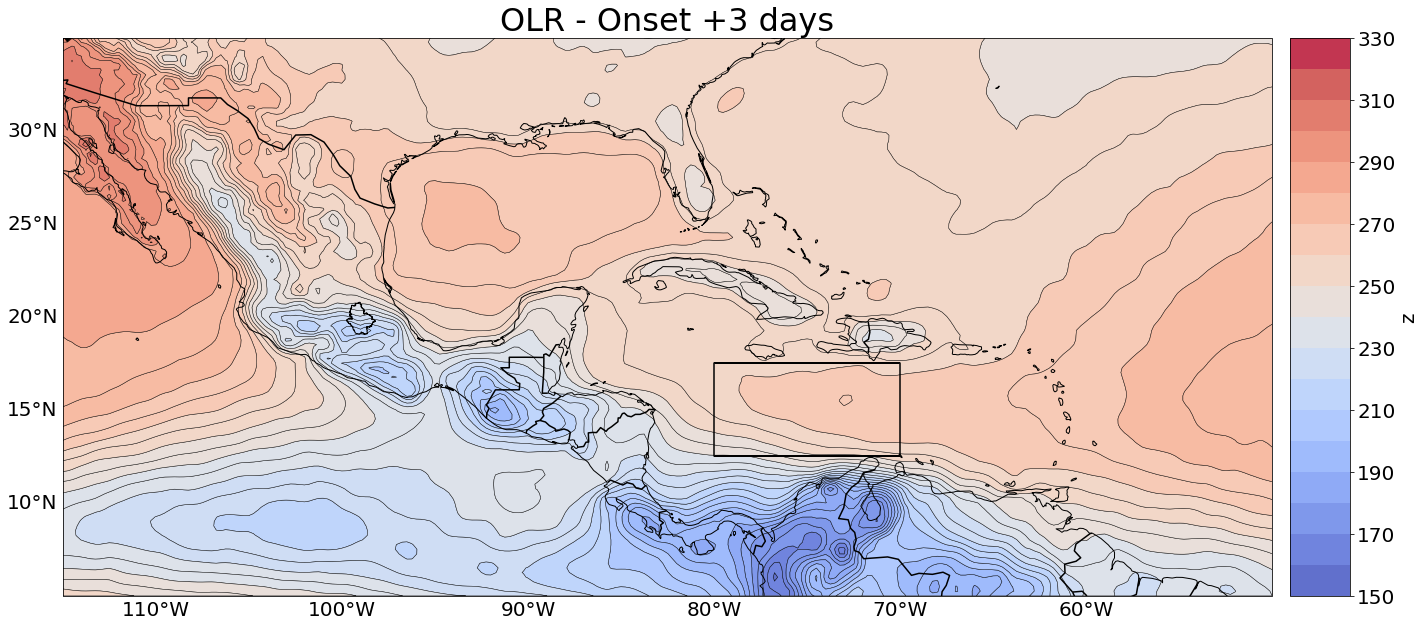

:Overlay
   .FilledContours.I :FilledContours   [Longitude,Latitude]   (z)
   .Path.I           :Path   [Longitude,Latitude]   (featurecla)
   .Borders.I        :Feature   [Longitude,Latitude]
   .Path.II          :Path   [Longitude,Latitude]   (AREA,PERIMETER,COV_,COV_ID,CLAVE,ORG_CUENCA,CLV_OC,SHAPE_AREA,SHAPE_LEN)
   .Rectangles.I     :Rectangles   [lon0,lat0,lon1,lat1]
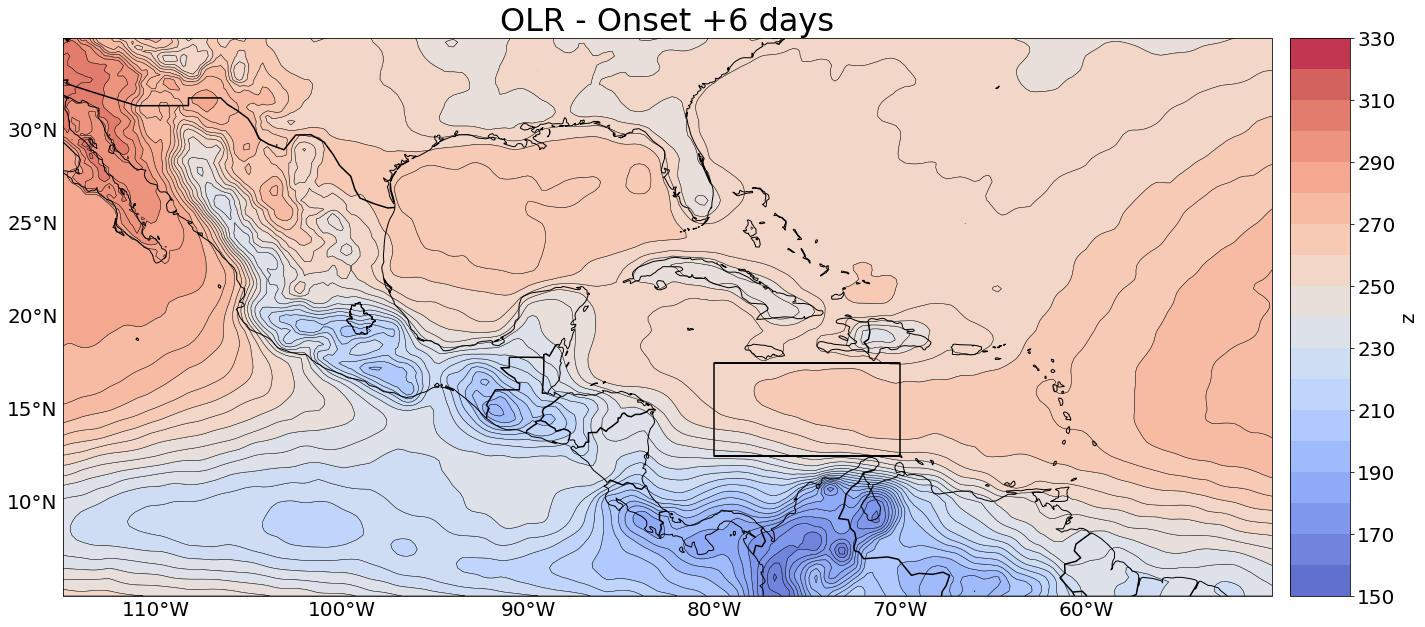

:Overlay
   .FilledContours.I :FilledContours   [Longitude,Latitude]   (z)
   .Path.I           :Path   [Longitude,Latitude]   (featurecla)
   .Borders.I        :Feature   [Longitude,Latitude]
   .Path.II          :Path   [Longitude,Latitude]   (AREA,PERIMETER,COV_,COV_ID,CLAVE,ORG_CUENCA,CLV_OC,SHAPE_AREA,SHAPE_LEN)
   .Rectangles.I     :Rectangles   [lon0,lat0,lon1,lat1]
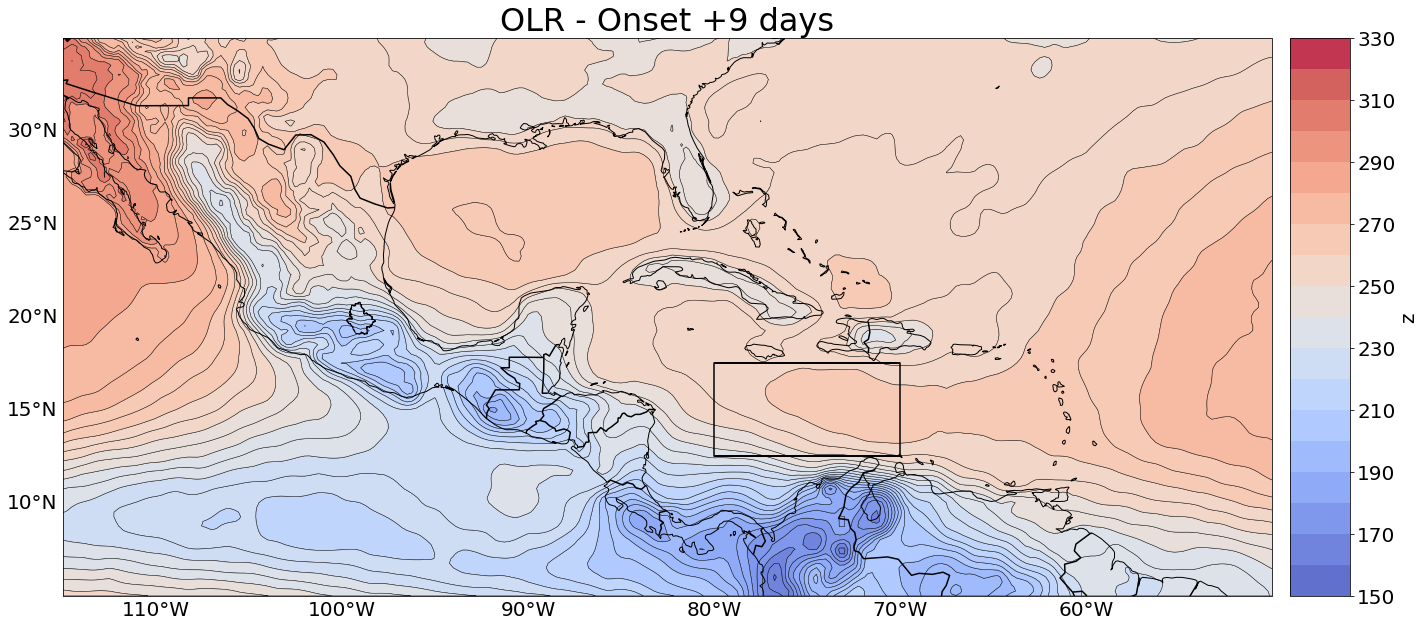

In [ ]:
# Campos de viento para una zona en particular y distintos días.

region = (-115, 5, -50, 35)
days = (-9, 9)
s = 5
w = 0.1
sc = 0.5
delta = 3
min = 150
lim = 330
d = 60
fname_r = "onset_composite_" + vars[2]

# Seleccionamos la region.
vfield = composite.sel( longitude = slice(region[0], region[2]), 
    latitude = slice(region[3], region[1]) ).copy()

# Convertimos a arreglos de numpy.
lon   =   vfield["longitude"].to_numpy()
lat   =   vfield["latitude"].to_numpy()
mag   = - vfield["mtnlwrf"].to_numpy()

mag_i = mag.copy()
lon_i = lon.copy()
lat_i = lat.copy()

# Convertimos cada fecha a objeto de Holoviews y graficamos.
# Días a graficar.
day = np.arange( days[0] + d, days[1] + d + delta, delta)
maps = []
for i in range( day.shape[0] ):

    mag_i[day[i], 0, 0] = lim - 0.02
    mag_i[day[i], 0, 1] = min + 0.02

    gv_fc = gv.FilledContours( (lon_i, lat_i, mag_i[day[i]]) ).opts(
        title = f"OLR - Onset {day[i] - d:+d} days", fontsize = {"title": 16},
        xlim = (region[0], region[2]), ylim = (region[1], region[3]),
        cmap = "coolwarm", colorbar = True, alpha = 0.8,
        color_levels = 18, levels = 36, linewidth = 0.5,
        cbar_ticks = np.arange(min, lim + 20, 20).tolist() )

    img = ( gv_fc * area ).opts(fontscale = 2)
    maps.append( hv.render(img) )
    maps[i].axes[1].set_ylabel("Outgoing Longwave Radiation [W/m²]")
    maps[i].savefig( path_r + fname_r + f"_{day[i] - 60:+d}.png",
        bbox_inches = "tight" )
    gv.output( img, size = 600 )

In [ ]:
mag_s = mag[day[0]:day[-1] + 1, :, :].flatten()
mag_s.sort()

mag_s[0]

159.09839782714843

:Overlay
   .FilledContours.I :FilledContours   [Longitude,Latitude]   (z)
   .Path.I           :Path   [Longitude,Latitude]   (featurecla)
   .Borders.I        :Feature   [Longitude,Latitude]
   .Path.II          :Path   [Longitude,Latitude]   (AREA,PERIMETER,COV_,COV_ID,CLAVE,ORG_CUENCA,CLV_OC,SHAPE_AREA,SHAPE_LEN)
   .Rectangles.I     :Rectangles   [lon0,lat0,lon1,lat1]
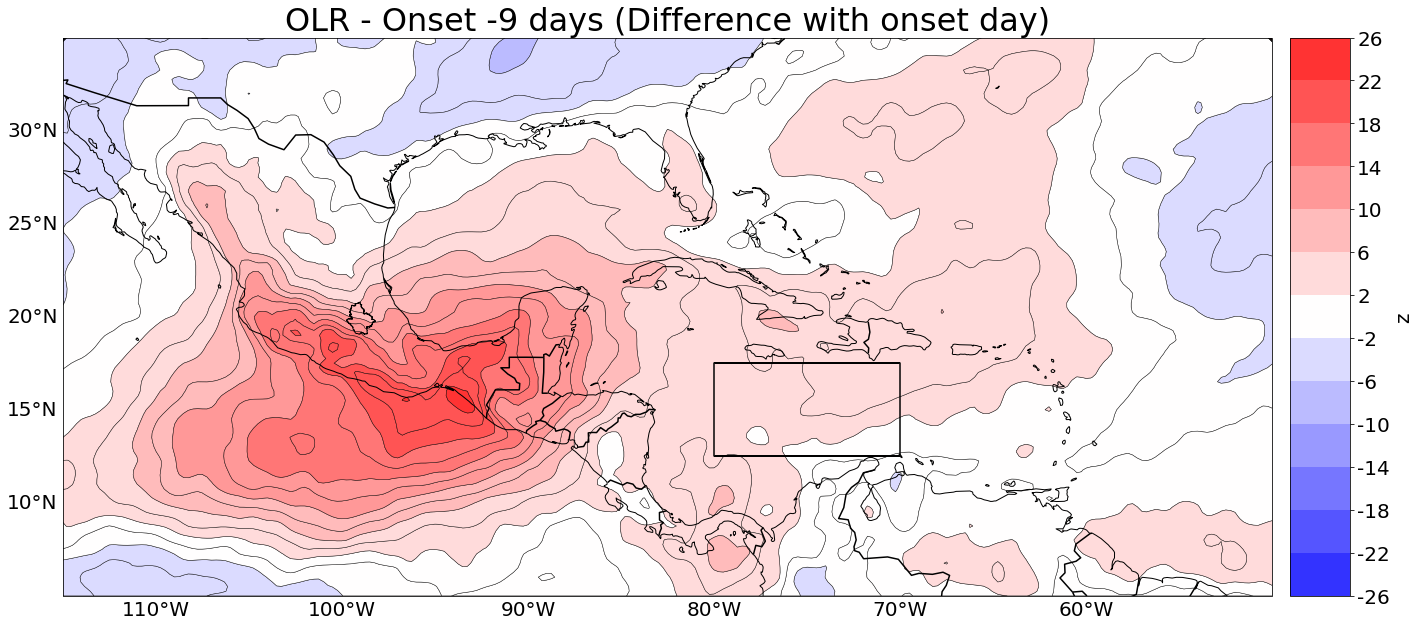

:Overlay
   .FilledContours.I :FilledContours   [Longitude,Latitude]   (z)
   .Path.I           :Path   [Longitude,Latitude]   (featurecla)
   .Borders.I        :Feature   [Longitude,Latitude]
   .Path.II          :Path   [Longitude,Latitude]   (AREA,PERIMETER,COV_,COV_ID,CLAVE,ORG_CUENCA,CLV_OC,SHAPE_AREA,SHAPE_LEN)
   .Rectangles.I     :Rectangles   [lon0,lat0,lon1,lat1]
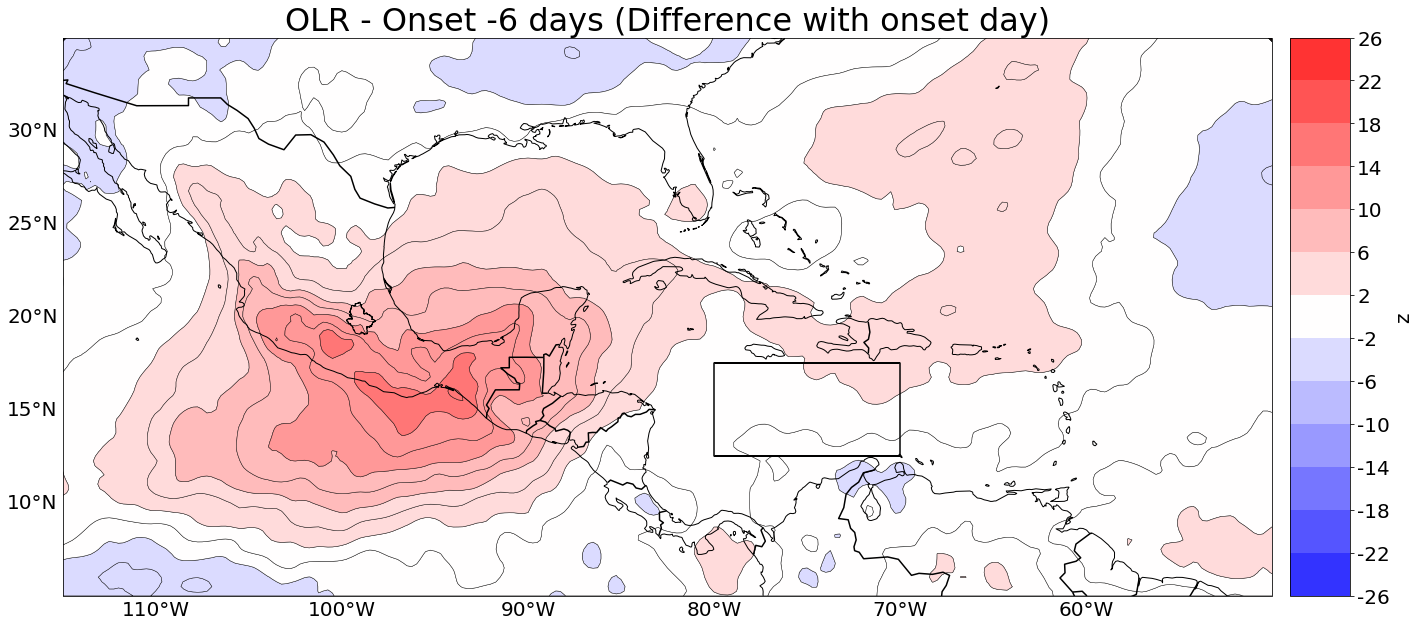

:Overlay
   .FilledContours.I :FilledContours   [Longitude,Latitude]   (z)
   .Path.I           :Path   [Longitude,Latitude]   (featurecla)
   .Borders.I        :Feature   [Longitude,Latitude]
   .Path.II          :Path   [Longitude,Latitude]   (AREA,PERIMETER,COV_,COV_ID,CLAVE,ORG_CUENCA,CLV_OC,SHAPE_AREA,SHAPE_LEN)
   .Rectangles.I     :Rectangles   [lon0,lat0,lon1,lat1]
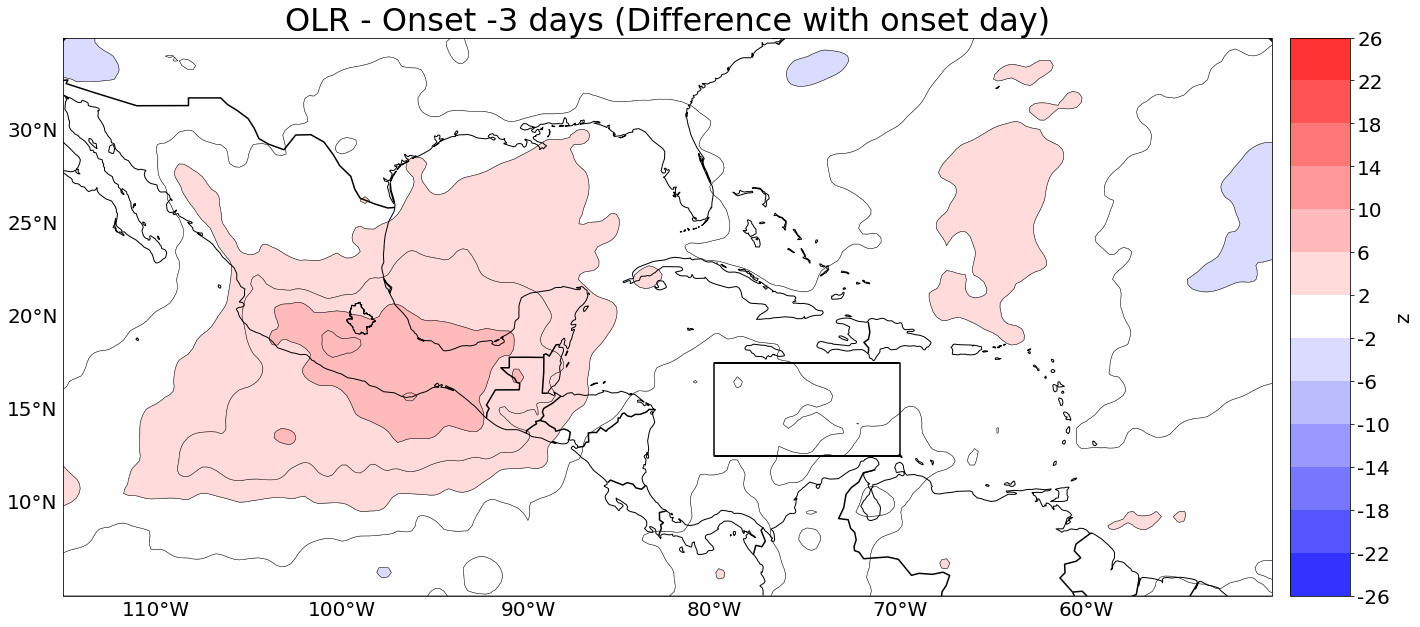

:Overlay
   .FilledContours.I :FilledContours   [Longitude,Latitude]   (z)
   .Path.I           :Path   [Longitude,Latitude]   (featurecla)
   .Borders.I        :Feature   [Longitude,Latitude]
   .Path.II          :Path   [Longitude,Latitude]   (AREA,PERIMETER,COV_,COV_ID,CLAVE,ORG_CUENCA,CLV_OC,SHAPE_AREA,SHAPE_LEN)
   .Rectangles.I     :Rectangles   [lon0,lat0,lon1,lat1]
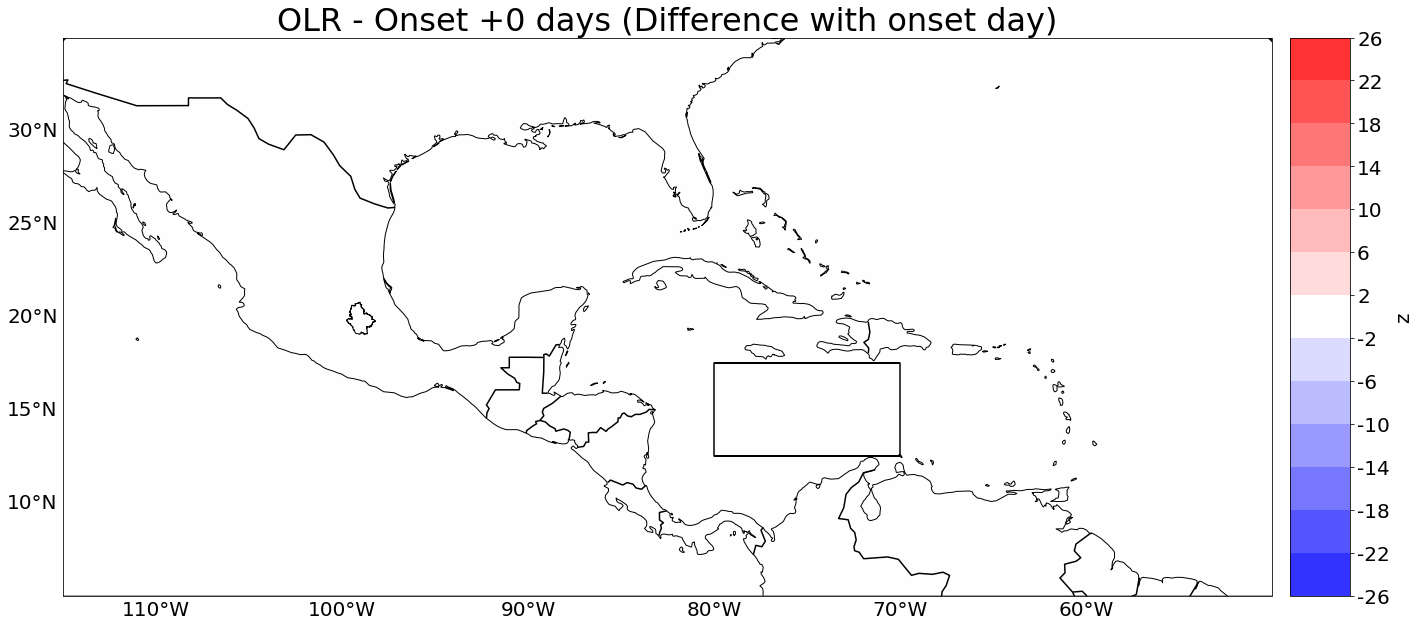

:Overlay
   .FilledContours.I :FilledContours   [Longitude,Latitude]   (z)
   .Path.I           :Path   [Longitude,Latitude]   (featurecla)
   .Borders.I        :Feature   [Longitude,Latitude]
   .Path.II          :Path   [Longitude,Latitude]   (AREA,PERIMETER,COV_,COV_ID,CLAVE,ORG_CUENCA,CLV_OC,SHAPE_AREA,SHAPE_LEN)
   .Rectangles.I     :Rectangles   [lon0,lat0,lon1,lat1]
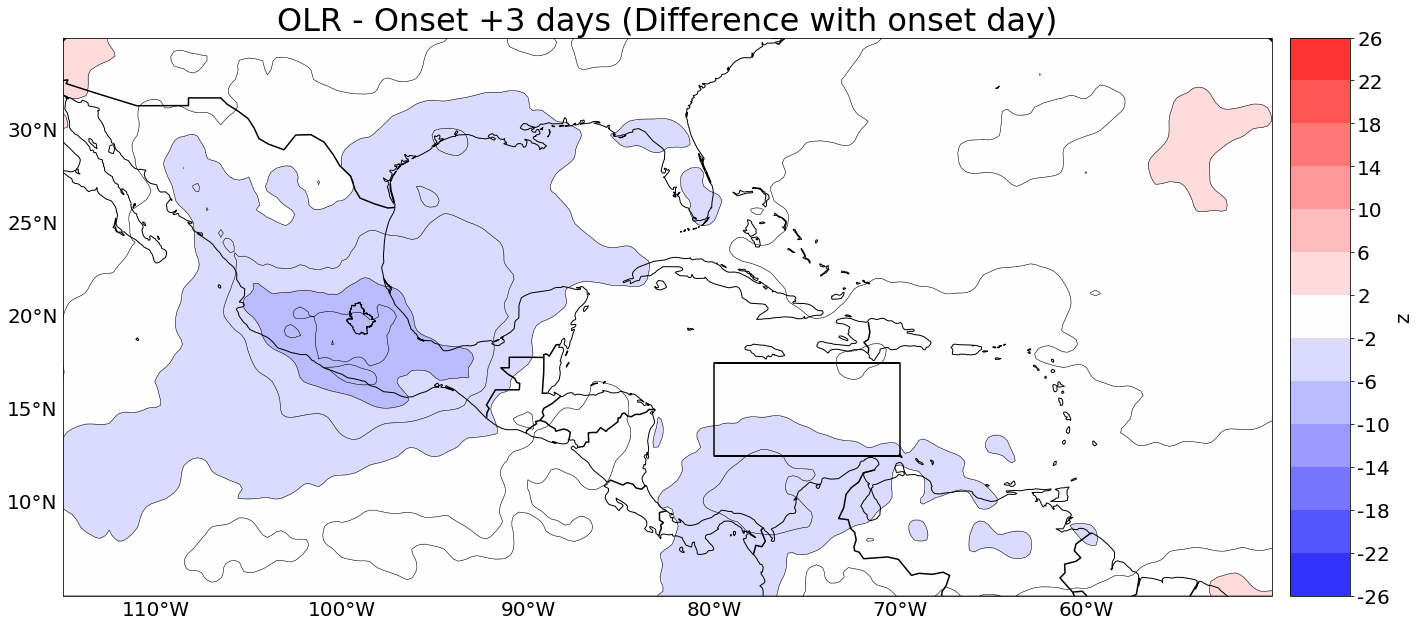

:Overlay
   .FilledContours.I :FilledContours   [Longitude,Latitude]   (z)
   .Path.I           :Path   [Longitude,Latitude]   (featurecla)
   .Borders.I        :Feature   [Longitude,Latitude]
   .Path.II          :Path   [Longitude,Latitude]   (AREA,PERIMETER,COV_,COV_ID,CLAVE,ORG_CUENCA,CLV_OC,SHAPE_AREA,SHAPE_LEN)
   .Rectangles.I     :Rectangles   [lon0,lat0,lon1,lat1]
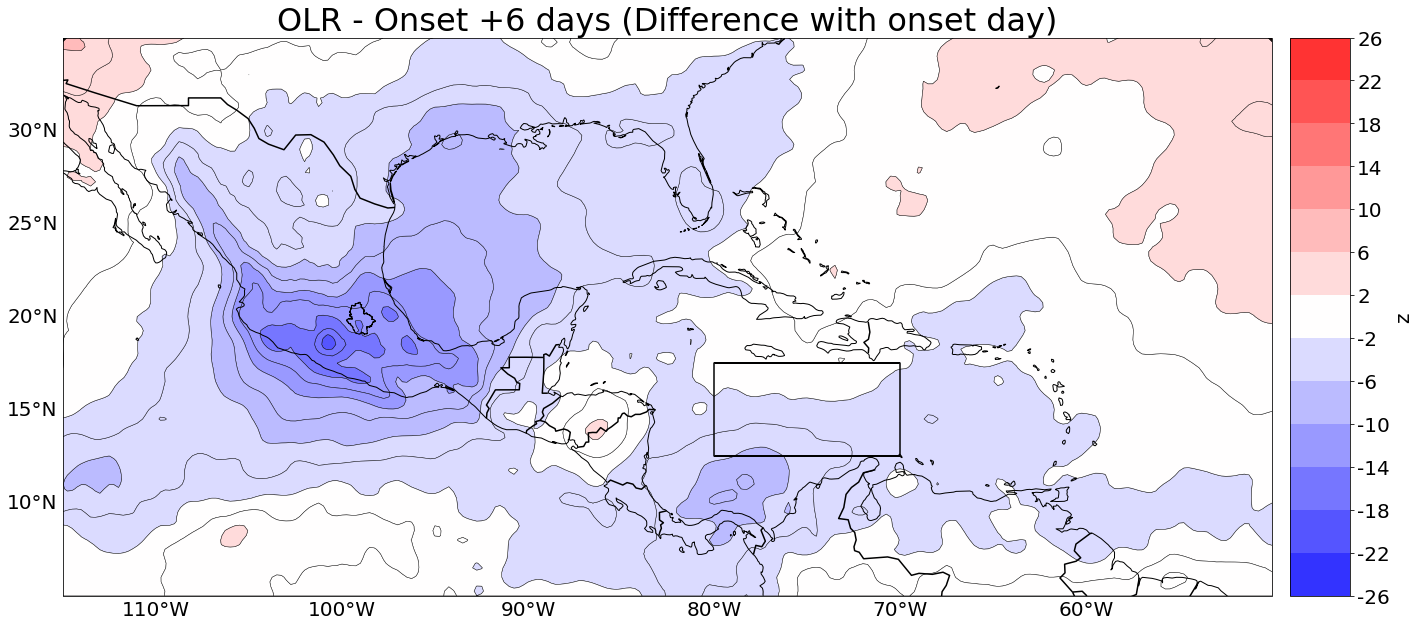

:Overlay
   .FilledContours.I :FilledContours   [Longitude,Latitude]   (z)
   .Path.I           :Path   [Longitude,Latitude]   (featurecla)
   .Borders.I        :Feature   [Longitude,Latitude]
   .Path.II          :Path   [Longitude,Latitude]   (AREA,PERIMETER,COV_,COV_ID,CLAVE,ORG_CUENCA,CLV_OC,SHAPE_AREA,SHAPE_LEN)
   .Rectangles.I     :Rectangles   [lon0,lat0,lon1,lat1]
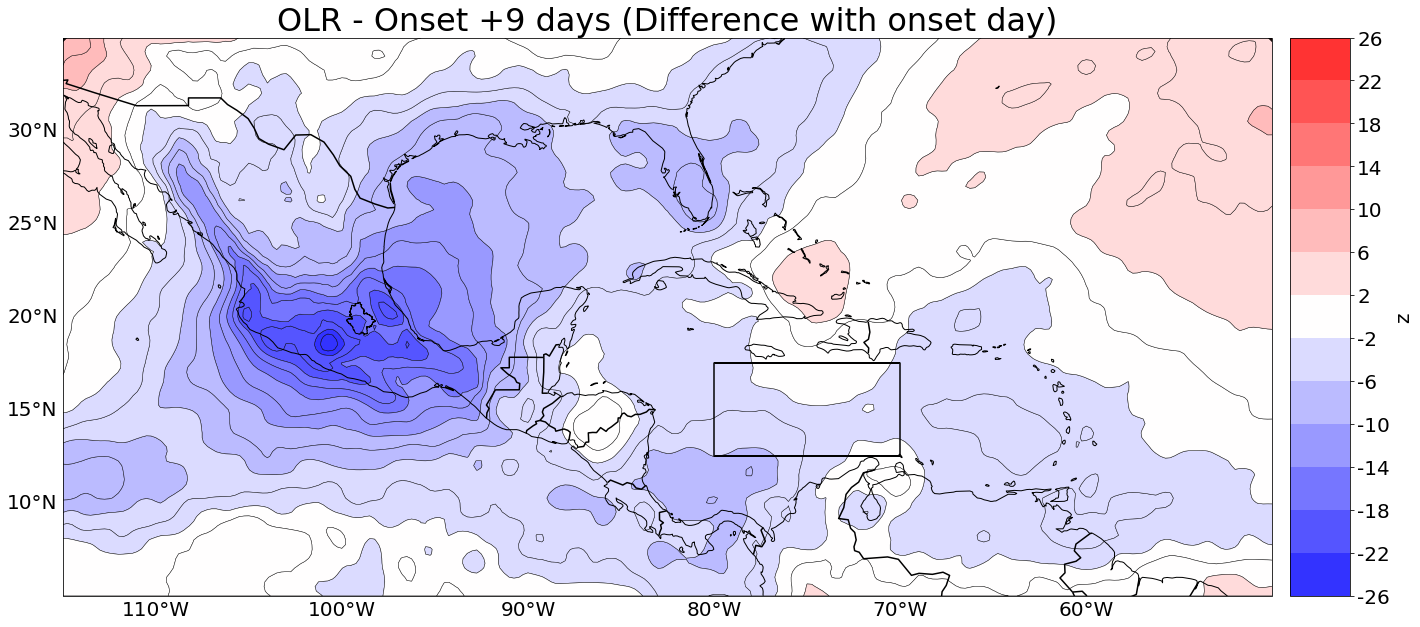

In [ ]:
# Campos de viento para una zona en particular y distintos días.

region = (-115, 5, -50, 35)
days = (-9, 9)
s = 5
w = 0.1
sc = 0.5
delta = 3
min = -26
lim = -min
d = 60
fname_r = "onset_composite_" + vars[2] + "_diff"

composite_diff = composite.copy()
composite_diff["mtnlwrf"] = ( composite_diff["mtnlwrf"]
    - composite_diff["mtnlwrf"].sel( dayofyear = 0 ) )

# Seleccionamos la region.
vfield = composite_diff.sel( longitude = slice(region[0], region[2]), 
    latitude = slice( region[3], region[1]) ).copy()

# Convertimos a arreglos de numpy.
lon   =     vfield["longitude"].to_numpy()
lat   =     vfield["latitude"].to_numpy()
mag   = ( - vfield["mtnlwrf"].to_numpy() )

mag_i = mag.copy()
lon_i = lon.copy()
lat_i = lat.copy()

# Convertimos cada fecha a objeto de Holoviews y graficamos.
# Días a graficar.
day = np.arange( days[0] + d, days[1] + d + delta, delta)
maps = []
for i in range( day.shape[0] ):

    #mag_i[day[i]] = np.clip( mag_i[day[i]], min + 0.5, lim - 0.5 )
    mag_i[day[i], 0, -1] = lim - 0.5
    mag_i[day[i], 0,  0] = min + 0.5

    gv_fc = gv.FilledContours( (lon_i, lat_i, mag_i[day[i]]) ).opts(
        title = f"OLR - Onset {day[i] - d:+d}" + 
        " days (Difference with onset day)", fontsize = {"title": 16},
        xlim = (region[0], region[2]), ylim = (region[1], region[3]),
        cmap = "bwr", colorbar = True, alpha = 0.8,
        color_levels = 13, levels = 26, linewidth = 0.5,
        cbar_ticks = np.arange(min, lim + 4, 4).tolist() )

    img = ( gv_fc * area ).opts(fontscale = 2)
    maps.append( hv.render(img) )
    maps[i].axes[1].set_ylabel("Outgoing Longwave Radiation [W/m²]")
    maps[i].savefig( path_r + fname_r + f"_{day[i] - 60:+d}.png",
        bbox_inches = "tight" )
    gv.output( img, size = 600 )

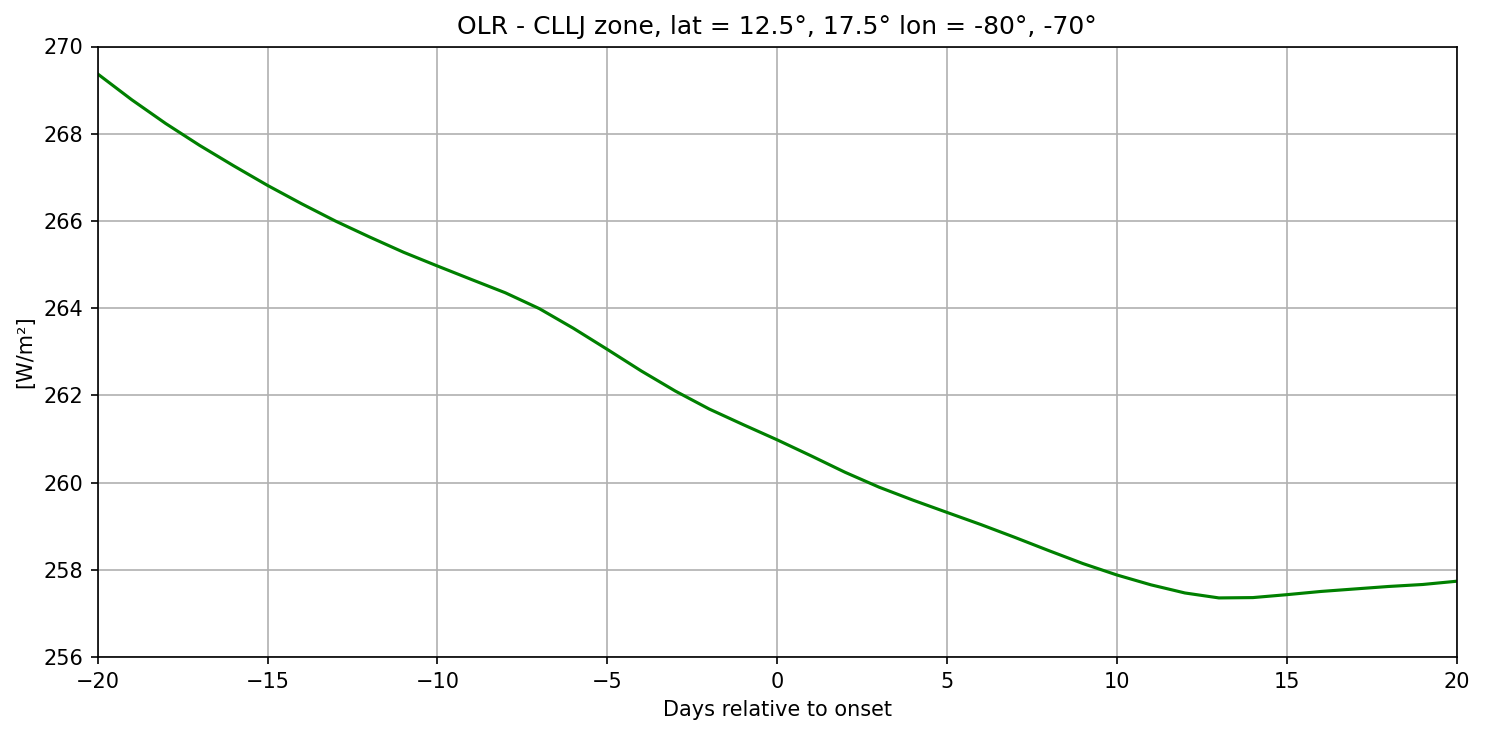

In [ ]:
# Promedio del viento en una región.
# Zona del CLLJ.

# Regresamos al backend estándar de Jupyter.
%matplotlib inline
from matplotlib import pyplot as plt

fname_r = "CLLJ_onset_composite_" + vars[2] + ".png"

# Longitud de media móvil.
s = 10

# Área a graficar.
i = 1

# Graficamos.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(10, 5)
fig.set_dpi(150)

# Seleccionamos la región.
vfield = composite.sel( longitude = slice(zones[i][0], zones[i][2]), 
    latitude = slice(zones[i][3], zones[i][1]) ).copy()

# Promediamos y graficamos.
( ( - vfield.mean( ["latitude", "longitude" ] ).to_dataframe()["mtnlwrf"]
    ).rolling(s).mean().loc[-20:20].plot(ax = ax, color = "g") )
    
ax.set_xlim(-20, 20)
ax.set_ylim(256, 270)
ax.set_title("OLR - CLLJ zone, lat = " + str(zones[i][1]) + "°, "
    + str(zones[i][3]) + "° lon = " + str(zones[i][0])
    + "°, " + str(zones[i][2]) + "°" )
ax.set_ylabel("[W/m²]")
ax.set_xlabel("Days relative to onset")
ax.grid( visible = True, which = "both" )

fig.tight_layout()
fig.savefig( path_r + fname_r, bbox_inches = "tight" )

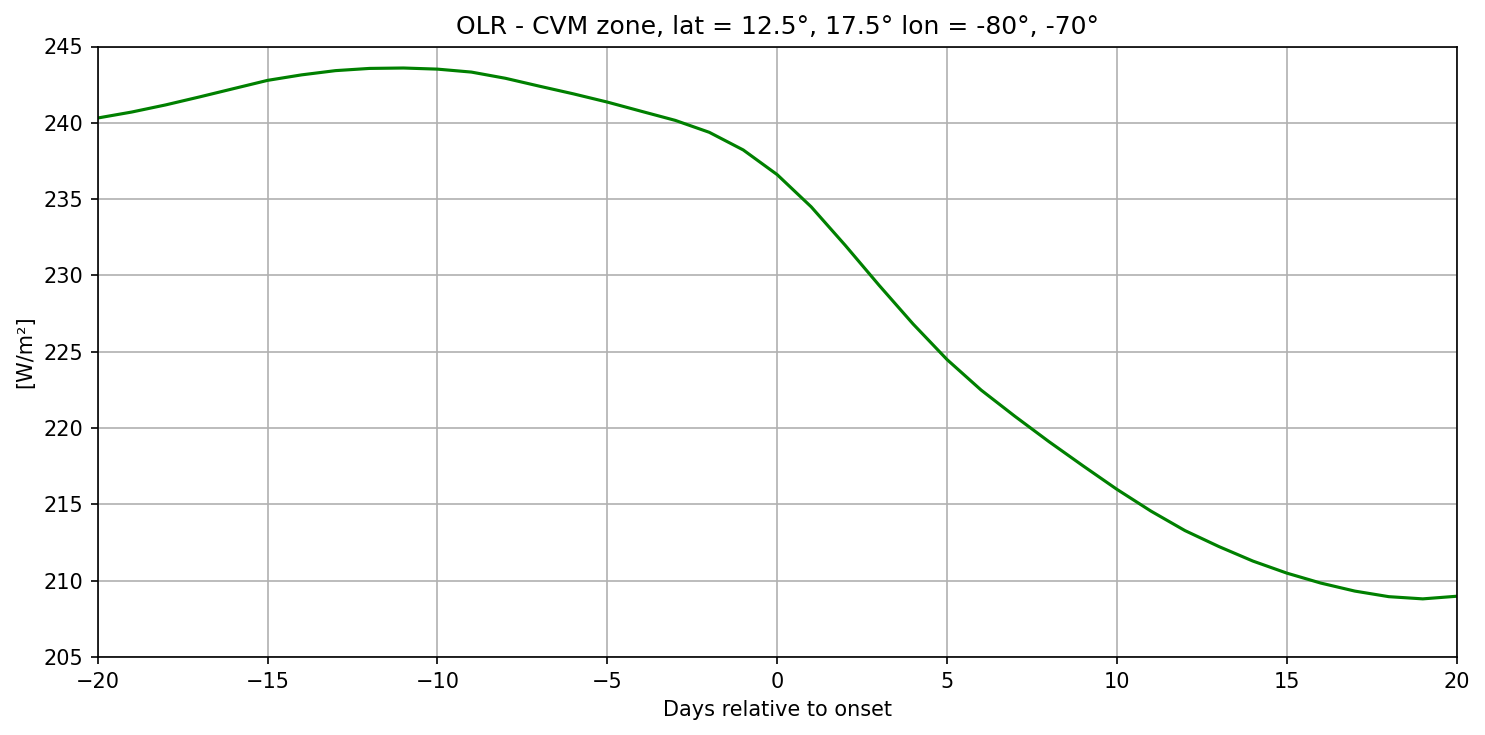

In [ ]:
# Promedio del OLR en una región.
# Cuenca del Valle de México.

# Regresamos al backend estándar de Jupyter.
%matplotlib inline
from matplotlib import pyplot as plt

fname_r = "CVM_onset_composite_" + vars[2] + ".png"

# Longitud de media móvil.
s = 5

# Área a graficar.
i = 1

# Graficamos.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(10, 5)
fig.set_dpi(150)

# Establecemos un CRS.
composite = composite.rio.write_crs(4326)
# Recortamos la cuenca del Valle de México.
clip = composite.rio.clip(
    gdf[ gdf["ORG_CUENCA"] == "Aguas del Valle de México" ].geometry,
    gdf.crs, drop = False, invert = False).drop( "spatial_ref" )

# Promediamos y graficamos.
( ( - clip.mean( ["latitude", "longitude" ] ).to_dataframe()["mtnlwrf"]
    ).rolling(s).mean().loc[-20:20].plot(ax = ax, color = "g") )
    
ax.set_xlim(-20, 20)
ax.set_ylim(205, 245)
ax.set_title("OLR - CVM zone, lat = " + str(zones[i][1]) + "°, "
    + str(zones[i][3]) + "° lon = " + str(zones[i][0])
    + "°, " + str(zones[i][2]) + "°" )
ax.set_ylabel("[W/m²]")
ax.set_xlabel("Days relative to onset")
ax.grid( visible = True, which = "both" )

fig.tight_layout()
fig.savefig( path_r + fname_r, bbox_inches = "tight" )